In [ ]:
install.packages('Amelia')

In [1]:
df.train <- read.csv('titanic_train.csv')

In [2]:
head(df.train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2017 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


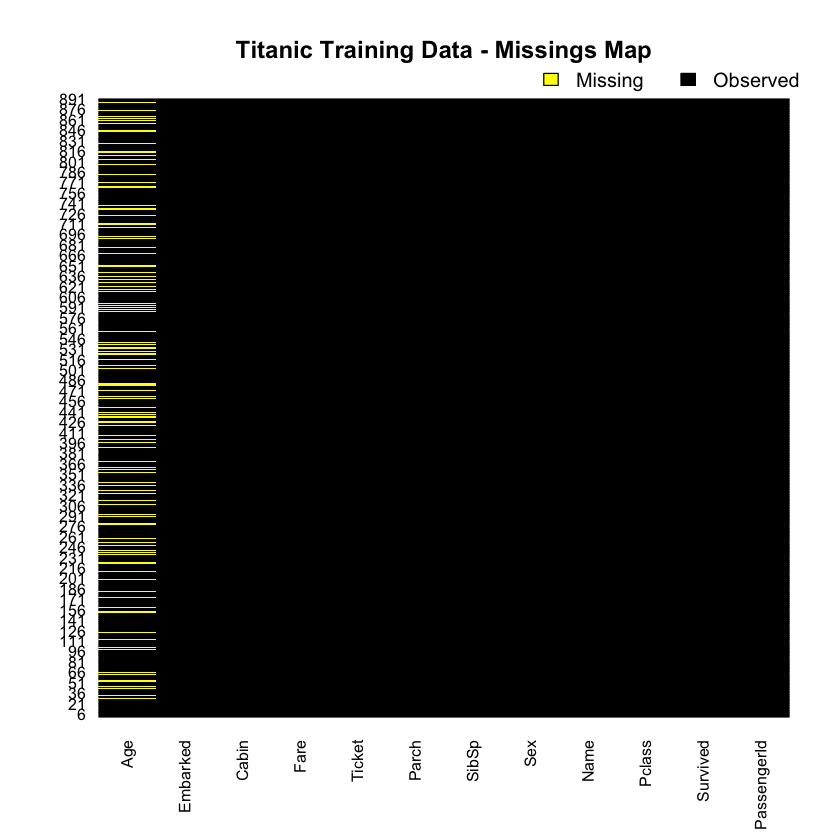

In [3]:
library(Amelia)
missmap(df.train, main="Titanic Training Data - Missings Map", 
        col=c("yellow", "black"), legend=TRUE)

In [4]:
library(ggplot2)

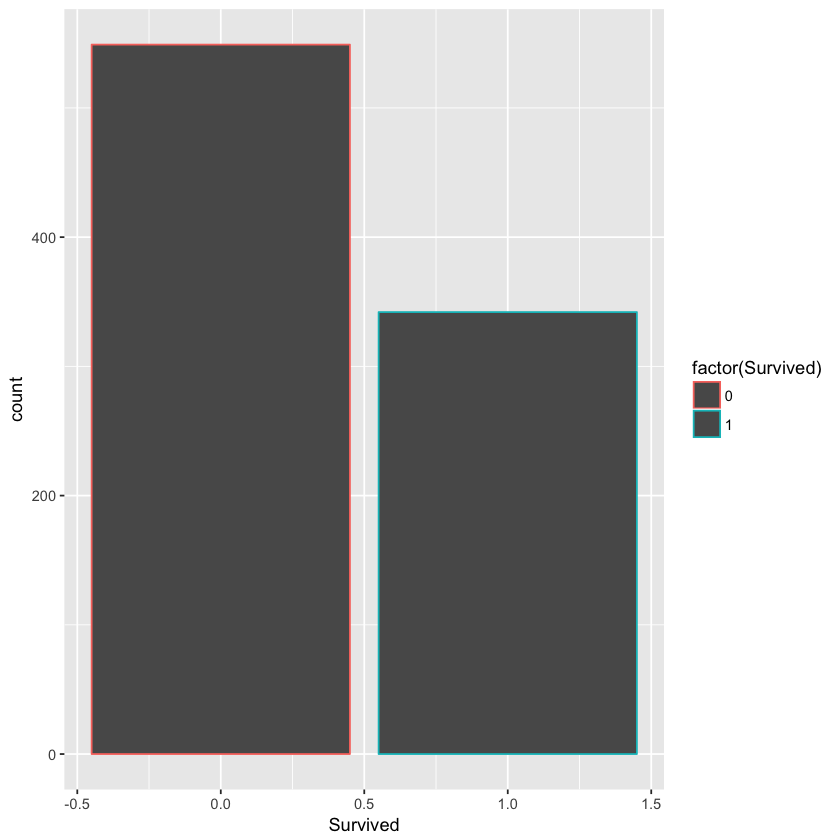

In [5]:
ggplot(df.train,aes(Survived)) + geom_bar(aes(color=factor(Survived)))

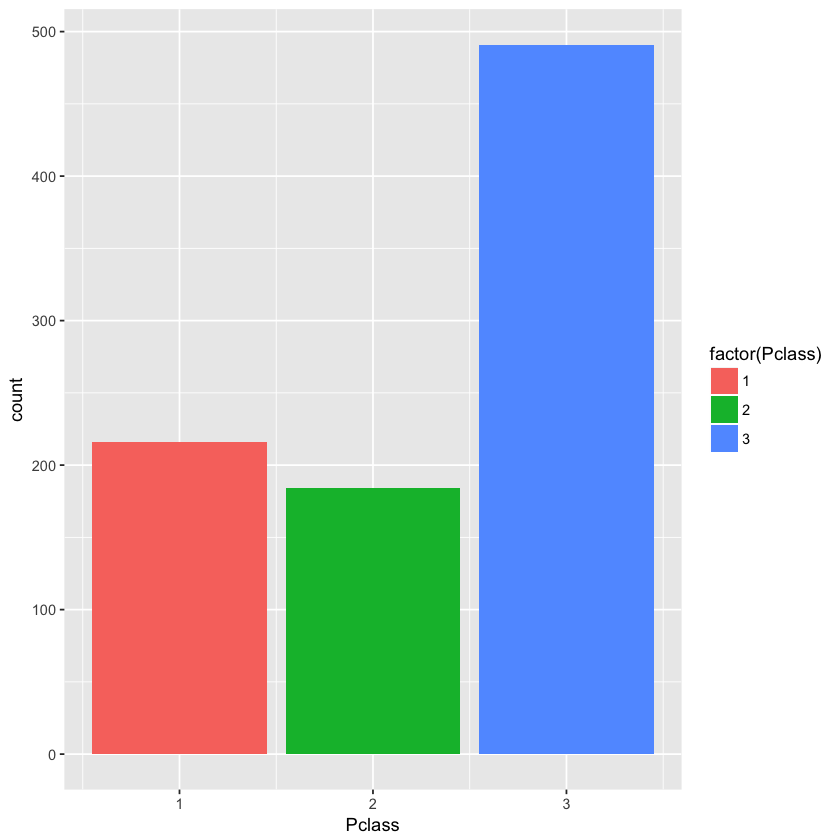

In [6]:
ggplot(df.train,aes(Pclass)) + geom_bar(aes(fill = factor(Pclass)))

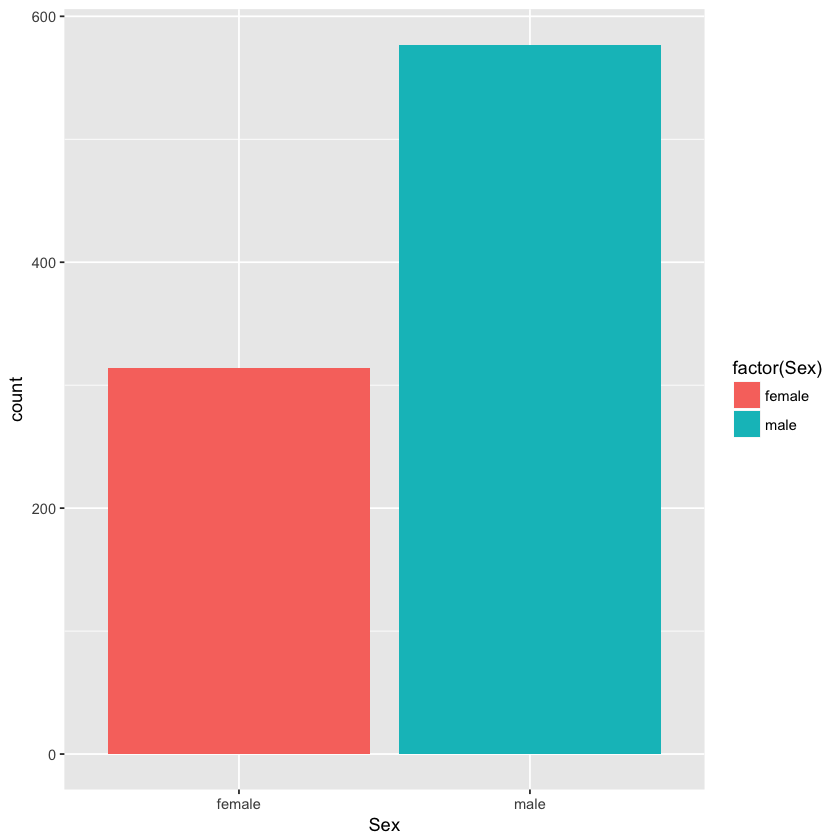

In [7]:
ggplot(df.train, aes(Sex)) + geom_bar(aes(fill = factor(Sex)))

Warning message:
“`geom_bar()` no longer has a `binwidth` parameter. Please use `geom_histogram()` instead.”Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

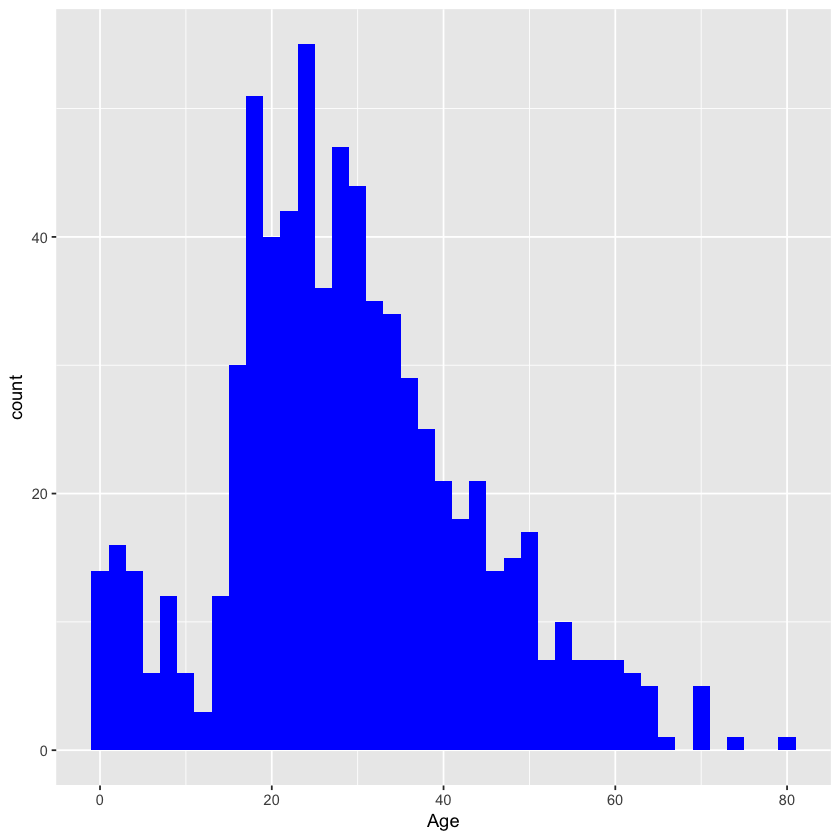

In [8]:
ggplot(df.train, aes(Age)) + geom_bar(binwidth = 2,fill = 'blue')

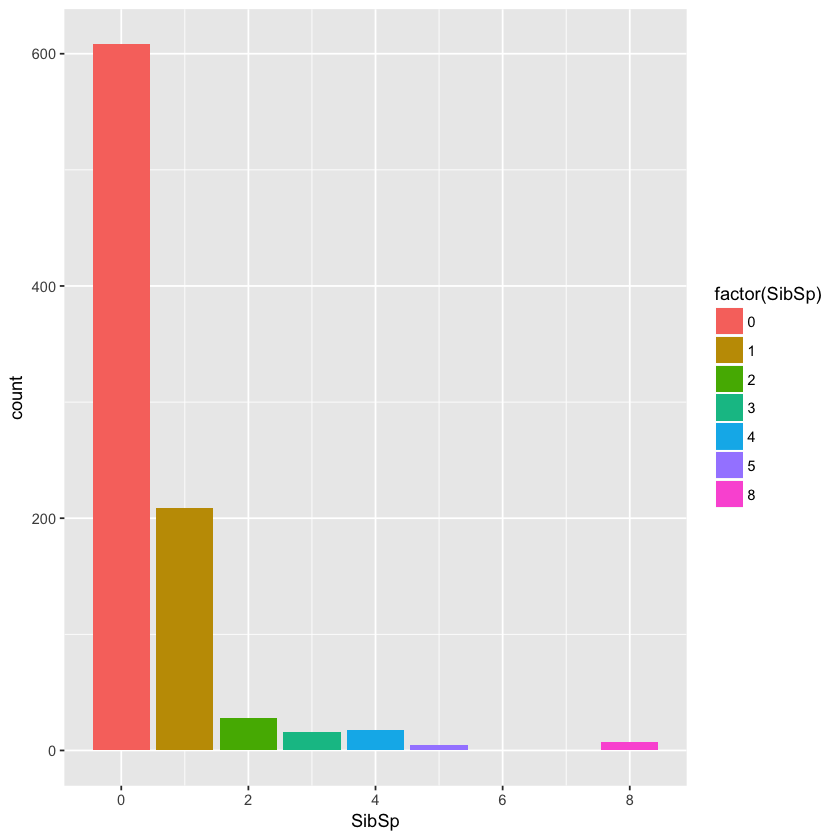

In [9]:
ggplot(df.train, aes(SibSp)) + geom_bar(aes(fill=factor(SibSp)))

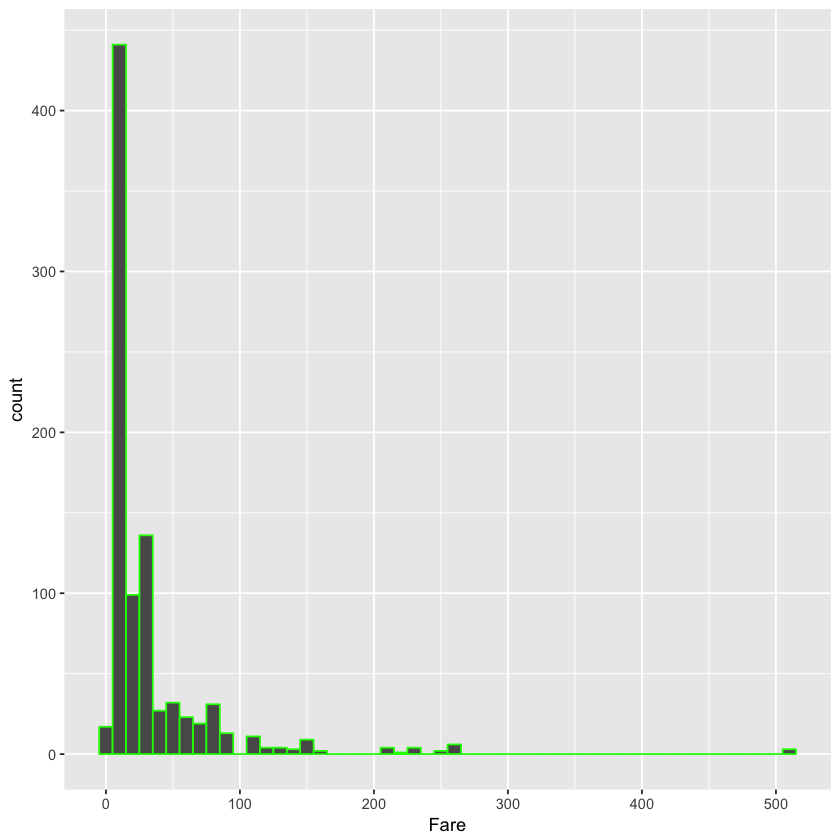

In [10]:
ggplot(df.train, aes(Fare)) + geom_histogram(color = 'green',binwidth = 10)

Warning message:
“Removed 177 rows containing non-finite values (stat_boxplot).”

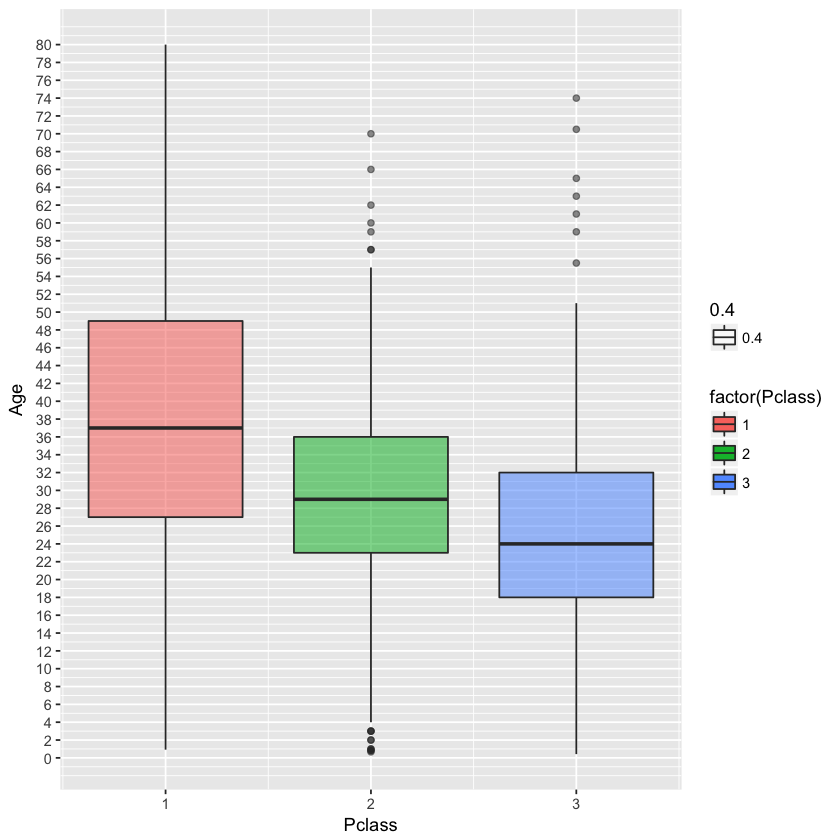

In [11]:
pl <- ggplot(df.train,aes(Pclass,Age)) + geom_boxplot(aes(group=Pclass,fill=factor(Pclass),alpha=0.4)) 
pl + scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

In [227]:
impute_age <- function(age,class){
    out <- age
    for (i in 1:length(age)){
        
        if (is.na(age[i])){

            if (class[i] == 1){
                out[i] <- 37

            }else if (class[i] == 2){
                out[i] <- 29

            }else{
                out[i] <- 24
            }
        }else{
            out[i]<-age[i]
        }
    }
    return(out)
}

In [14]:
fixed.ages <- impute_age(df.train$Age,df.train$Pclass)

df.train$Age <- fixed.ages

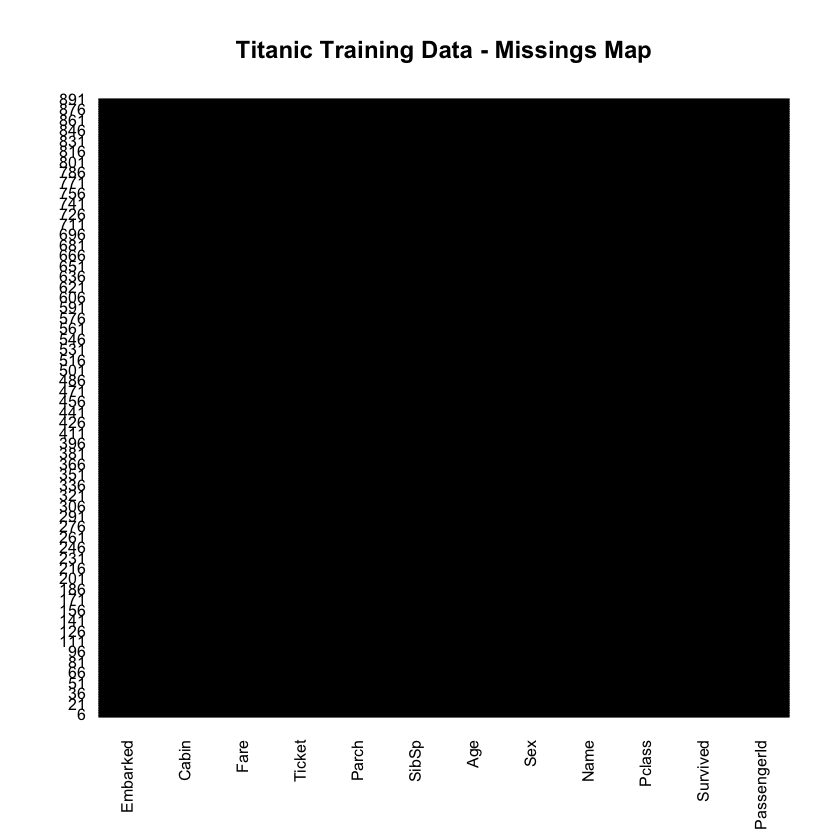

In [15]:
missmap(df.train, main="Titanic Training Data - Missings Map", 
        col=c("yellow", "black"), legend=FALSE)

In [16]:
str(df.train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 354 273 16 555 516 625 413 577 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [17]:
head(df.train,3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S


In [18]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [19]:
df.train <- select(df.train,-PassengerId,-Name,-Ticket,-Cabin)

In [20]:
head(df.train)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.9250,S
1,1,female,35,1,0,53.1000,S
0,3,male,35,0,0,8.0500,S
0,3,male,24,0,0,8.4583,Q


In [21]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [22]:
df.train$Survived <- factor(df.train$Survived)
df.train$Pclass <- factor(df.train$Pclass)
df.train$Parch <- factor(df.train$Parch)
df.train$SibSp <- factor(df.train$SibSp)

In [23]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...
 $ Parch   : Factor w/ 7 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 3 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [24]:
head(df.train)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C
1,3,female,26,0,0,7.9250,S
1,1,female,35,1,0,53.1000,S
0,3,male,35,0,0,8.0500,S
0,3,male,24,0,0,8.4583,Q


In [25]:
log.model <- glm(Survived ~. , family = binomial(link = 'logit'), data = df.train)

In [26]:
summary(log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8158  -0.6134  -0.4138   0.5808   2.4896  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.845e+01  1.660e+03   0.011 0.991134    
Pclass2     -1.079e+00  3.092e-01  -3.490 0.000484 ***
Pclass3     -2.191e+00  3.161e-01  -6.930 4.20e-12 ***
Sexmale     -2.677e+00  2.040e-01 -13.123  < 2e-16 ***
Age         -3.971e-02  8.758e-03  -4.534 5.79e-06 ***
SibSp1       8.135e-02  2.245e-01   0.362 0.717133    
SibSp2      -2.897e-01  5.368e-01  -0.540 0.589361    
SibSp3      -2.241e+00  7.202e-01  -3.111 0.001862 ** 
SibSp4      -1.675e+00  7.620e-01  -2.198 0.027954 *  
SibSp5      -1.595e+01  9.588e+02  -0.017 0.986731    
SibSp8      -1.607e+01  7.578e+02  -0.021 0.983077    
Parch1       3.741e-01  2.895e-01   1.292 0.196213    
Parch2       3.862e-02  3.824e-01   0.101 0.919560    
Parch3   

In [27]:
library(caTools)

In [28]:
set.seed(101)

In [29]:
split <- sample.split(df.train$Survived,SplitRatio = 0.7)

In [30]:
final.train <- subset(df.train, split == TRUE)
final.test <- subset(df.train, split == FALSE)

In [31]:
final.log.model <- glm(Survived ~., family = binomial(link = 'logit'),data = final.train)

In [32]:
summary(final.log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8288  -0.5607  -0.4096   0.6174   2.4898  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.777e+01  2.400e+03   0.007 0.994091    
Pclass2     -1.230e+00  3.814e-01  -3.225 0.001261 ** 
Pclass3     -2.160e+00  3.841e-01  -5.624 1.87e-08 ***
Sexmale     -2.660e+00  2.467e-01 -10.782  < 2e-16 ***
Age         -3.831e-02  1.034e-02  -3.705 0.000212 ***
SibSp1      -2.114e-02  2.755e-01  -0.077 0.938836    
SibSp2      -4.000e-01  6.463e-01  -0.619 0.536028    
SibSp3      -2.324e+00  8.994e-01  -2.584 0.009765 ** 
SibSp4      -1.196e+00  8.302e-01  -1.440 0.149839    
SibSp5      -1.603e+01  9.592e+02  -0.017 0.986666    
SibSp8      -1.633e+01  1.004e+03  -0.016 0.987019    
Parch1       7.290e-01  3.545e-01   2.056 0.039771 *  
Parch2       1.406e-01  4.504e-01   0.312 0.754892    
Parch3

In [33]:
fitted.probabilities <- predict(final.log.model,newdata=final.test,type='response')

In [34]:
fitted.results <- ifelse(fitted.probabilities > 0.5,1,0)

misClasificError <- mean(fitted.results != final.test$Survived)
print(paste('Accuracy',1-misClasificError))

table(final.test$Survived, fitted.probabilities > 0.5)

In [76]:
df.test <- read.csv('titanic_test.csv')

In [77]:
head(df.test)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [174]:
df.test <- select(df.test,-PassengerId,-Name,-Ticket,-Cabin)

ERROR: Error in eval(expr, envir, enclos): object 'PassengerId' not found


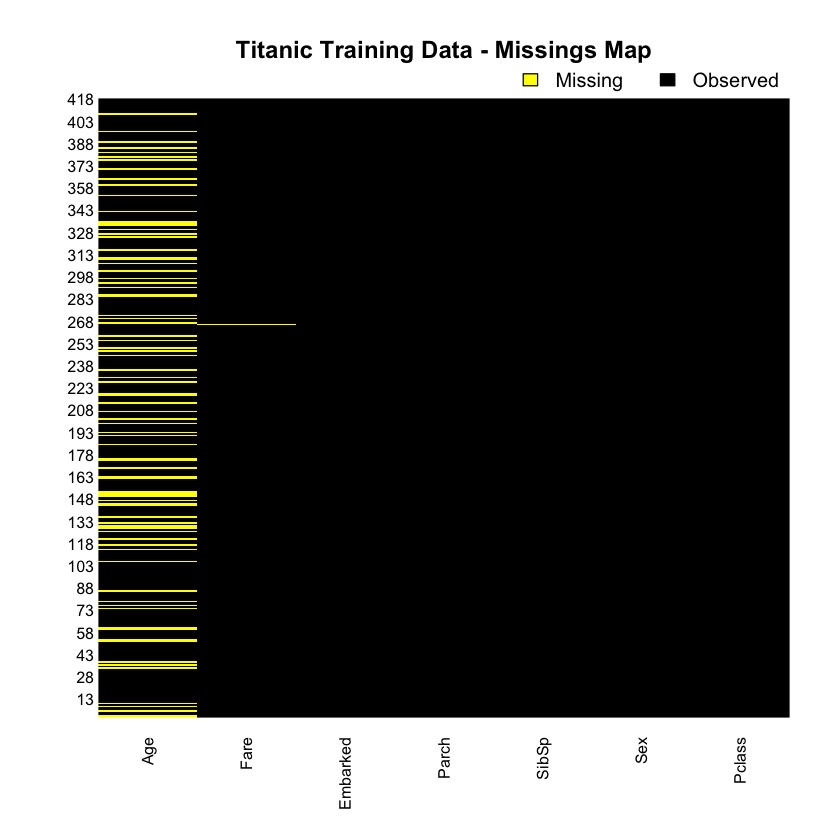

In [79]:
missmap(df.test, main="Titanic Training Data - Missings Map", 
        col=c("yellow", "black"), legend=TRUE)

In [41]:
str(df.test)

'data.frame':	418 obs. of  7 variables:
 $ Pclass  : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age     : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp   : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch   : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Fare    : num  7.83 7 9.69 8.66 12.29 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...


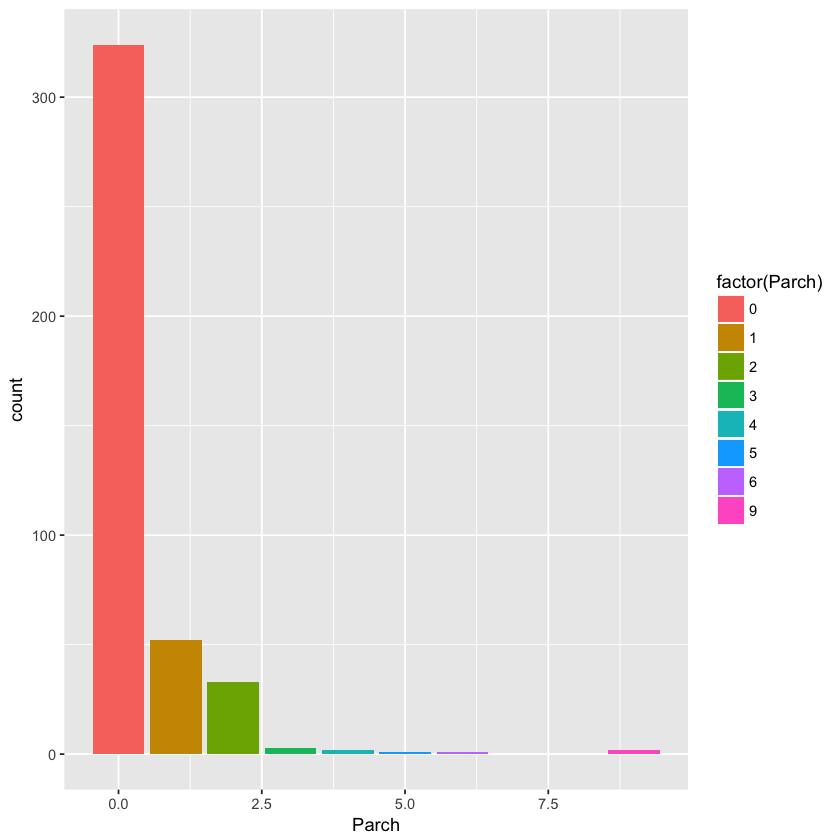

In [82]:
ggplot(df.test, aes(Parch)) + geom_bar(aes(fill = factor(Parch)))

In [42]:
df.test$Pclass <- factor(df.test$Pclass)
df.test$Parch <- factor(df.test$Parch)
df.test$SibSp <- factor(df.test$SibSp)

In [43]:
fitted.probabilities_test <- predict(final.log.model,newdata=df.test,type='response')

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels): factor Parch has new levels 9


In [44]:
df.train$Survived <- factor(df.train$Survived)
df.train$Parch <- factor(df.train$Parch,levels = c(0,1,2,3,4,5,6,9))
df.train$Parch <- factor(df.train$Parch)
df.train$SibSp <- factor(df.train$SibSp)

In [45]:
str(df.train)

'data.frame':	891 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...
 $ Parch   : Factor w/ 7 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 3 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [48]:
tail(df.train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,3,female,39,0,5,29.125,Q
887,0,2,male,27,0,0,13.000,S
888,1,1,female,19,0,0,30.000,S
889,0,3,female,24,1,2,23.450,S
890,1,1,male,26,0,0,30.000,C
891,0,3,male,32,0,0,7.750,Q


In [165]:
df.train <- read.csv('titanic_train.csv')

In [166]:
fixed.ages <- impute_age(df.train$Age,df.train$Pclass)

df.train$Age <- fixed.ages

In [167]:
df.train <- select(df.train,-PassengerId,-Name,-Ticket,-Cabin)

In [160]:
df.train <- rbind(df.train,c(1,1,NA,37,0,9,30,NA))

In [132]:
df.train <- rbind(df.train,c(NA,NA,NA,NA,NA,9,NA,NA))

In [168]:
df.train$Survived <- factor(df.train$Survived)
df.train$Parch <- factor(df.train$Parch,levels = c(0,1,2,3,4,5,6,9))
df.train$Parch <- factor(df.train$Parch)
df.train$SibSp <- factor(df.train$SibSp)

In [179]:
str(df.train)

'data.frame':	892 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 24 54 2 27 14 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 2 2 1 2 1 1 1 4 1 2 ...
 $ Parch   : Factor w/ 8 levels "0","1","2","3",..: 1 1 1 1 1 1 1 2 3 1 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [141]:
summary(df.train)

 Survived     Pclass          Sex           Age        SibSp   Parch  
 0:549    Min.   :1.000   female:314   Min.   : 0.42   0:608   0:678  
 1:342    1st Qu.:2.000   male  :577   1st Qu.:22.00   1:209   1:118  
          Median :3.000                Median :26.00   2: 28   2: 80  
          Mean   :2.309                Mean   :29.07   3: 16   3:  5  
          3rd Qu.:3.000                3rd Qu.:37.00   4: 18   4:  4  
          Max.   :3.000                Max.   :80.00   5:  5   5:  5  
                                                       8:  7   6:  1  
      Fare        Embarked
 Min.   :  0.00    :  2   
 1st Qu.:  7.91   C:168   
 Median : 14.45   Q: 77   
 Mean   : 32.20   S:644   
 3rd Qu.: 31.00           
 Max.   :512.33           
                          

In [170]:
summary(df.train)

 Survived     Pclass          Sex           Age        SibSp       Parch    
 0:549    Min.   :1.000   female:314   Min.   : 0.42   0:609   0      :678  
 1:343    1st Qu.:2.000   male  :578   1st Qu.:22.00   1:209   1      :118  
          Median :3.000                Median :26.00   2: 28   2      : 80  
          Mean   :2.307                Mean   :29.08   3: 16   3      :  5  
          3rd Qu.:3.000                3rd Qu.:37.00   4: 18   5      :  5  
          Max.   :3.000                Max.   :80.00   5:  5   4      :  4  
                                                       8:  7   (Other):  2  
      Fare         Embarked
 Min.   :  0.000    :  3   
 1st Qu.:  7.918   C:168   
 Median : 14.454   Q: 77   
 Mean   : 32.202   S:644   
 3rd Qu.: 31.000           
 Max.   :512.329           
                           

In [171]:
log.model <- glm(Survived ~. , family = binomial(link = 'logit'), data = df.train)

In [172]:
summary(log.model)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = df.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8183  -0.6115  -0.4141   0.5828   2.4889  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.955e+01  1.660e+03   0.012   0.9906    
Pclass      -1.098e+00  1.531e-01  -7.174 7.28e-13 ***
Sexmale     -2.678e+00  2.035e-01 -13.159  < 2e-16 ***
Age         -3.978e-02  8.704e-03  -4.570 4.88e-06 ***
SibSp1       8.167e-02  2.245e-01   0.364   0.7160    
SibSp2      -2.882e-01  5.366e-01  -0.537   0.5912    
SibSp3      -2.244e+00  7.188e-01  -3.122   0.0018 ** 
SibSp4      -1.680e+00  7.590e-01  -2.213   0.0269 *  
SibSp5      -1.595e+01  9.587e+02  -0.017   0.9867    
SibSp8      -1.608e+01  7.577e+02  -0.021   0.9831    
Parch1       3.756e-01  2.887e-01   1.301   0.1932    
Parch2       3.963e-02  3.822e-01   0.104   0.9174    
Parch3       3.681e-01  1.055e+00   0.349   0.7271    
Parch4   

In [193]:
df.test <- read.csv('titanic_test.csv')

In [194]:
head(df.test)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [195]:
df.test <- select(df.test,-PassengerId,-Name,-Ticket,-Cabin)

In [196]:
df.test$Parch <- factor(df.test$Parch)
df.test$SibSp <- factor(df.test$SibSp)

In [197]:
str(df.test)

'data.frame':	418 obs. of  7 variables:
 $ Pclass  : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age     : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp   : Factor w/ 7 levels "0","1","2","3",..: 1 2 1 1 2 1 1 2 1 3 ...
 $ Parch   : Factor w/ 8 levels "0","1","2","3",..: 1 1 1 1 2 1 1 2 1 1 ...
 $ Fare    : num  7.83 7 9.69 8.66 12.29 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...


In [198]:
fitted.probabilities_test <- predict(log.model,newdata=df.test,type='response')

In [199]:
fitted.results <- ifelse(fitted.probabilities_test > 0.5,1,0)

In [200]:
cbind(df.test,fitted.results)

Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fitted.results
3,male,34.5,0,0,7.8292,Q,0
3,female,47.0,1,0,7.0000,S,0
2,male,62.0,0,0,9.6875,Q,0
3,male,27.0,0,0,8.6625,S,0
3,female,22.0,1,1,12.2875,S,1
3,male,14.0,0,0,9.2250,S,0
3,female,30.0,0,0,7.6292,Q,1
2,male,26.0,1,1,29.0000,S,0
3,female,18.0,0,0,7.2292,C,1
3,male,21.0,2,0,24.1500,S,0


In [201]:
df.ID <- read.csv('titanic_test.csv')

In [202]:
df.ID <- df.ID['PassengerId']

In [204]:
Survived <- fitted.results

In [205]:
cbind(df.ID,Survived)

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1
901,0


In [206]:
df.test <- read.csv('titanic_test.csv')
head(df.test)
df.test <- select(df.test,-PassengerId,-Name,-Ticket,-Cabin)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


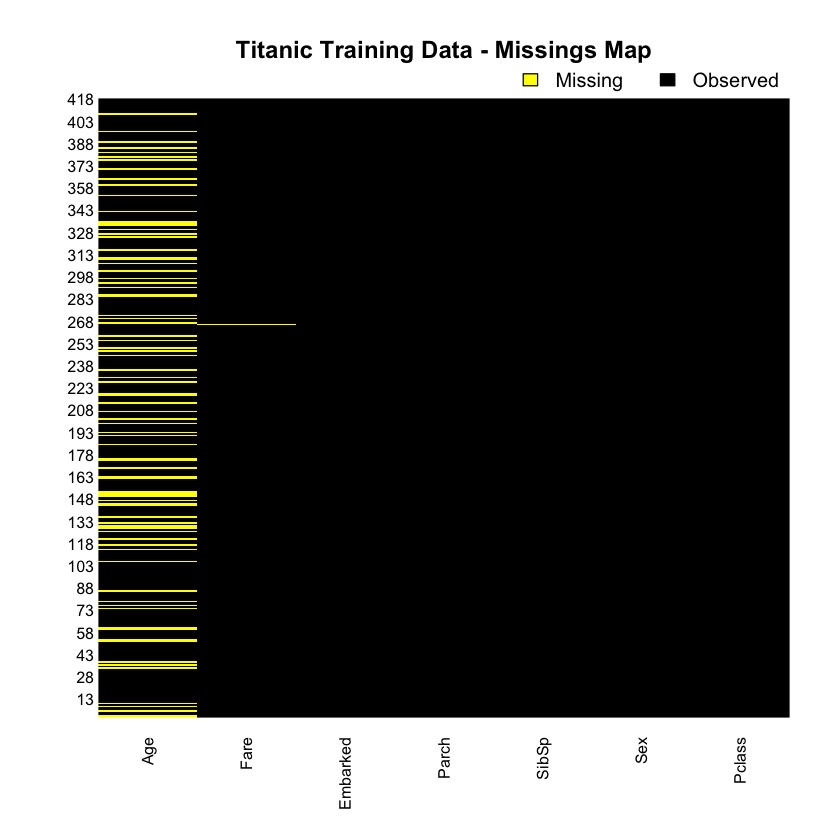

In [207]:
missmap(df.test, main="Titanic Training Data - Missings Map", 
        col=c("yellow", "black"), legend=TRUE)

Warning message:
“Removed 86 rows containing non-finite values (stat_boxplot).”

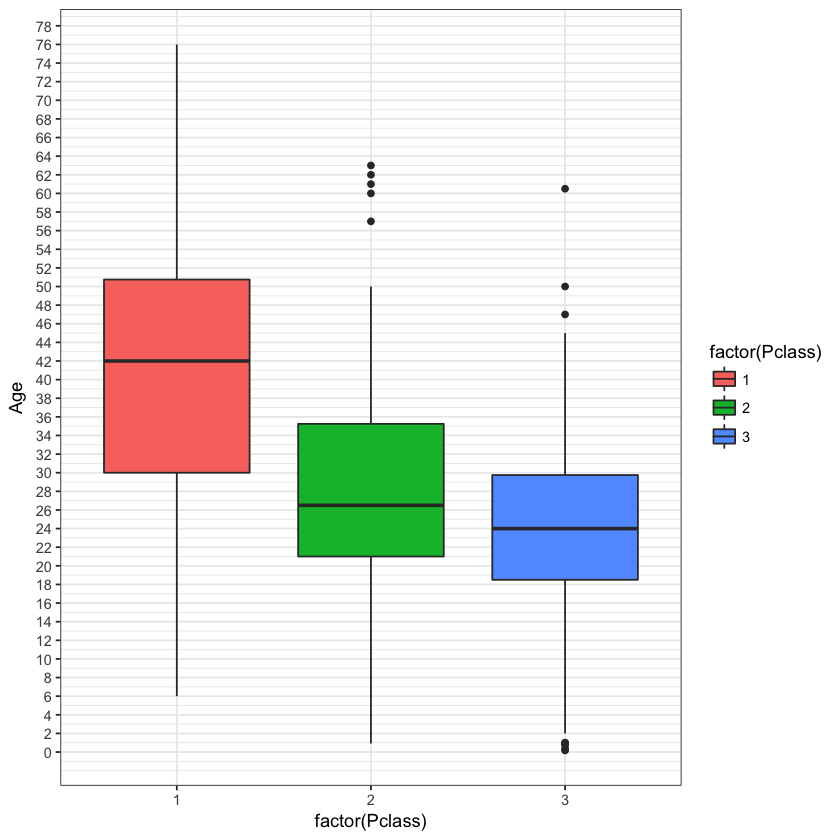

In [215]:
ggplot(df.test, aes(factor(Pclass),Age)) + geom_boxplot(aes(fill=factor(Pclass))) + theme_bw()+ scale_y_continuous(breaks = seq(min(0), max(80), by = 2))

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

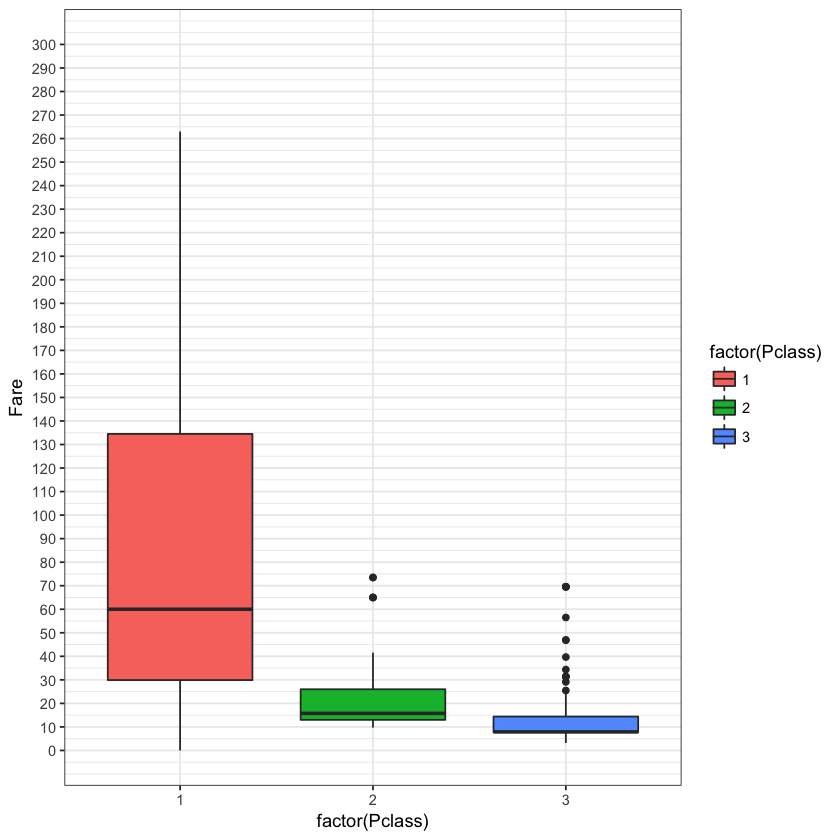

In [224]:
ggplot(df.test, aes(factor(Pclass),Fare)) + geom_boxplot(aes(fill=factor(Pclass))) + theme_bw() + scale_y_continuous(limits = c(0,300),breaks = seq(min(0), max(300), by = 10))

In [226]:
impute_age2 <- function(age,class){
    out <- age
    for (i in 1:length(age)){
        
        if (is.na(age[i])){

            if (class[i] == 1){
                out[i] <- 42

            }else if (class[i] == 2){
                out[i] <- 27

            }else{
                out[i] <- 24
            }
        }else{
            out[i]<-age[i]
        }
    }
    return(out)
}

In [230]:
fixed.ages <- impute_age2(df.test$Age,df.test$Pclass)

df.test$Age <- fixed.ages

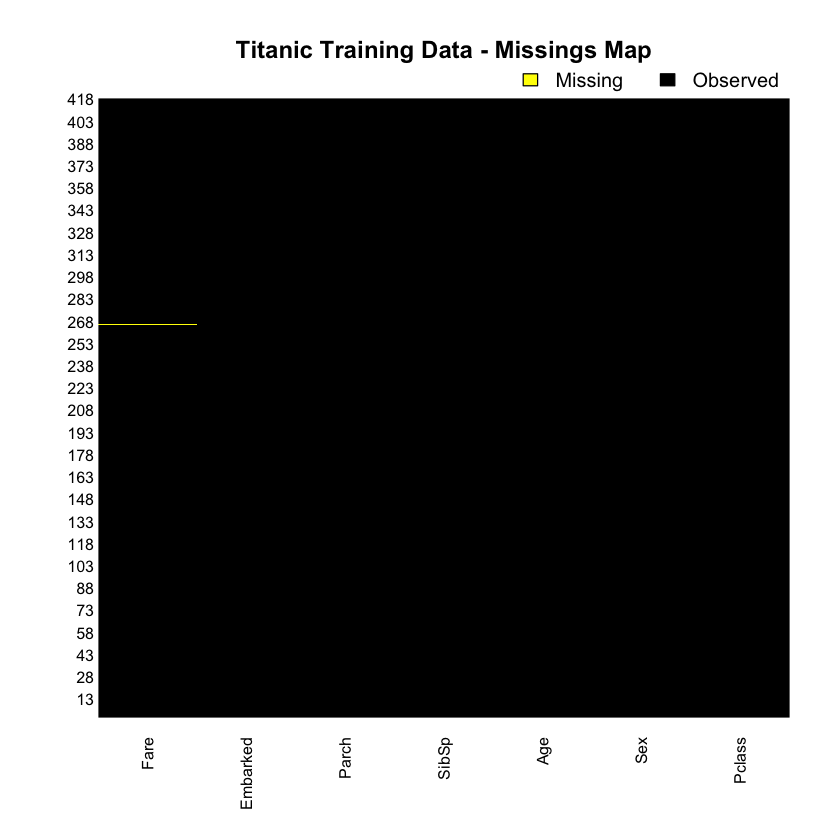

In [231]:
missmap(df.test, main="Titanic Training Data - Missings Map", 
        col=c("yellow", "black"), legend=TRUE)

In [237]:
impute_Fare <- function(fare,class){
    out <- fare
    for(i in 1:length(fare)){
        if (is.na(fare[i])){
            
            if (class[i] == 1){
                out[i] <- 60
            }
            
            else if (class[i] == 2){
                out[i] <- 16
            }
            else{
                out[i] <- 7
            
            }
        }
    }
    return(out)
}

In [238]:
fixed.fares <- impute_Fare(df.test$Fare,df.test$Pclass)
df.test$Fare <- fixed.fares

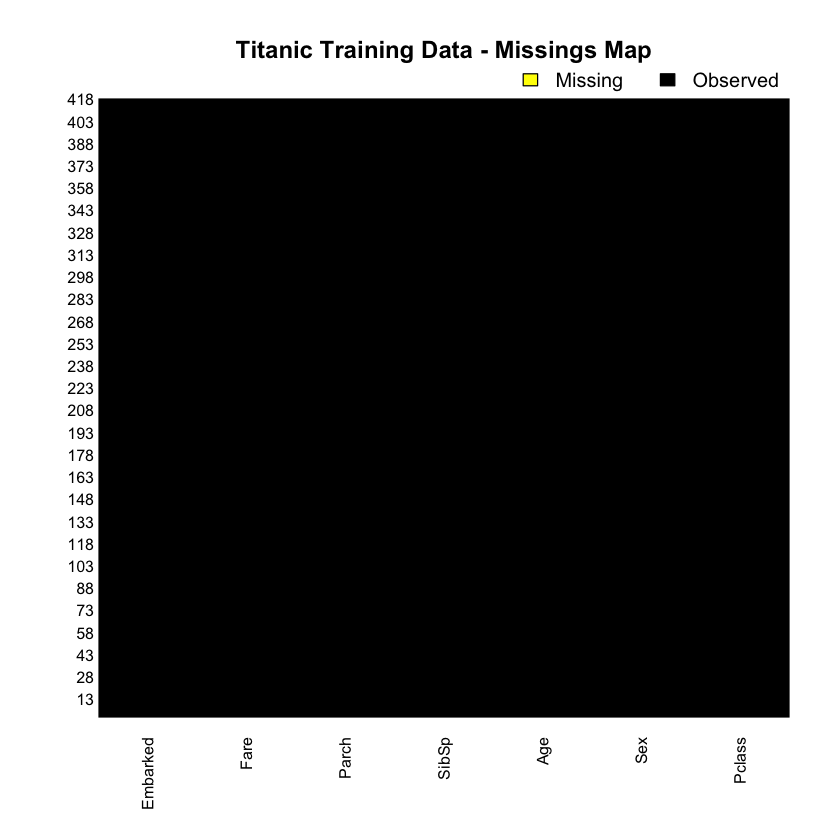

In [239]:
missmap(df.test, main="Titanic Training Data - Missings Map", 
        col=c("yellow", "black"), legend=TRUE)

In [240]:
df.test$Parch <- factor(df.test$Parch)
df.test$SibSp <- factor(df.test$SibSp)

In [241]:
fitted.probabilities_test <- predict(log.model,newdata=df.test,type='response')

In [242]:
fitted.results <- ifelse(fitted.probabilities_test > 0.5,1,0)

In [243]:
Survived <- fitted.results

In [245]:
final <- cbind(df.ID,Survived)

In [246]:
final

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1
901,0


In [247]:
all(is.na(final))

[1] FALSE

In [249]:
write.csv(final,file='Titanic_final.csv',row.names=FALSE)